# Text Vectorization

The process of turning our tokens into numerical values for our algorithm to make sense of it all is called __text vectorization__, or parsing. If we have a collection of documents, the goal will be to extract features from each document and create a mapping of documents to features.

In NLP, most features are based on how prevalent a word is in the document or the overall collection of documents. The higher the weight of a particular word, the more it describes the document.

![](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0402.png)

There are many different algorithms available that we can use to perform text vectorization. The main categories are as follows:
- __Count Vectorizers__: Counts the number of times a word comes up in a document, and uses this value as it's weight.
- __TF / IDF Vectorizers__: Appplying the weight based on both the frequency in the document, but also how unique the word is accross all documents.

## Count Vectorizers

When it comes to Count Vectorizers, we will take a look at the `sklearn.feature_extraction.text.CountVectorizer`.

The `CountVectorizer` is the simplest way of converting text to vector.

It tokenizes the documents to build a vocabulary of the words present in the corpus and counts how often each word from the vocabulary is present in each and every document in the corpus.

Thus, every document is represented by a vector whose size equals the vocabulary size and entries in the vector for a particular document show the count for words in that document.

When the document vectors are arranged as rows, the resulting matrix is called __document-term matrix__; it is a convenient way of representing a small corpus.

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The elephant sneezed at the sight of potatoes",
        "Bats can see via echolocation. See the bat sight sneeze!",
        "Wondering, she opened the door to the studio"]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print("Vocabulary")
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

Vocabulary
{'the': 16, 'elephant': 6, 'sneezed': 14, 'at': 0, 'sight': 12, 'of': 7, 'potatoes': 9, 'bats': 2, 'can': 3, 'see': 10, 'via': 18, 'echolocation': 5, 'bat': 1, 'sneeze': 13, 'wondering': 19, 'she': 11, 'opened': 8, 'door': 4, 'to': 17, 'studio': 15}


In [27]:
# summarize encoded vectors in a document-term matrix
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,at,bat,bats,can,door,echolocation,elephant,of,opened,potatoes,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,2,0,0,0
1,0,1,1,1,0,1,0,0,0,0,2,0,1,1,0,0,1,0,1,0
2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,2,1,0,1


### Parameter Tuning
A few useful parameters to try under the `CountVectorizer` include:
- `stop_words`: allows you to select a built-in list of stop words by indicating a language, or list of stop words to ignore
- `min_df`: in order to be considered a feature, a word needs to appear in at least the % of documents indicated here
- `max_def`: in order to be considered a feature, a word cannot appear in more than the % of documents indicated
- `max_features`: only consider a certain number of features, and include those that occur most frequently
    - Note: If there is a tie, the remaining features are selected alphabetically
- `ngram_range`: controls the size of word sequences (n-grams) to be included as features.
  - `(1,1)`: only single words (unigrams)
  - `(1,2)`: both single words and two-word phrases (bigrams)
  - `(2,2)`: only two-word phrases (bigrams)
  - `(1,3)`: unigrams, bigrams, and trigrams

Take a look at the next few cells and see how implementing these parameters changes the results.

In [28]:
vectorizer = CountVectorizer(stop_words='english')
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,elephant,opened,potatoes,sight,sneeze,sneezed,studio,wondering
0,0,0,0,0,1,0,1,1,0,1,0,0
1,1,1,0,1,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,1


In [29]:
vectorizer = CountVectorizer(stop_words='english', min_df=0.5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,sight
0,1
1,1
2,0


In [30]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,elephant,opened,potatoes,sneeze,sneezed,studio,wondering
0,0,0,0,0,1,0,1,0,1,0,0
1,1,1,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,1,1


In [31]:
vectorizer = CountVectorizer(stop_words='english', max_features=5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,sight
0,0,0,0,0,1
1,1,1,0,1,1
2,0,0,1,0,0


In [32]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bat sight,bats,bats echolocation,door,door studio,echolocation,echolocation bat,elephant,elephant sneezed,...,potatoes,sight,sight potatoes,sight sneeze,sneeze,sneezed,sneezed sight,studio,wondering,wondering opened
0,0,0,0,0,0,0,0,0,1,1,...,1,1,1,0,0,1,1,0,0,0
1,1,1,1,1,0,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


## TF-IDF Vectorizers

Simply using the word count as a feature value of a word really doesn’t reflect the importance of that word in a document.

For example, if a word is present frequently in all documents in a corpus, then its count value in different documents is not helpful in discriminating between different documents.

On other hand, if a word is present only in a few of documents, then its count value in those documents can help discriminating them from the rest of the documents.

Thus, the importance of a word, i.e. its feature value, for a document not only depends upon how often it is present in that document but also how is its overall presence in the corpus.

This notion of importance of a word in a document is captured by a scheme, known as the __term frequency-inverse document frequency__ or TF-IDF weighting scheme.

#### Terminology
To help explain how TF-IDF works, a few terms to get out of the way
- `t`: term (word)
- `d`: document (set of words)
- `corpus`: (collection of documents)
- `N`: number of documents in corpus

### Term Frequency - `tf`
The term frequency is a ratio of the count of a word’s occurrence in a document and the number of words in the document.
- It is a normalized measure that takes into account the document length.

#### `tf`(`t`,`d`) = count of `t` in `d` / number of words in `d`

### Document Frequency - `df`
The document frequency of a word represents the count of the number of documents in the corpus that contain the word.
- It allows us to determine how unique a word is in the first place.

#### `df`(`t`) = occurence of `t` in documents

### Inverse Document Frequency - `idf`
The inverse document frequency is the total number of documents in the corpus, divided by the document frequency or the number of documents that contain a particular term.
- When we calculate IDF, it will be very low for the most occurring words such as stop words (because stop words such as “is” is present in almost all of the documents, and N/df will give a very low value to that word).

#### `idf`(`t`) = `N` / `df`

However, this formula can be problematic:
- If a term appears in **all documents** (`df = N`), it results in `idf = 1`, reducing its importance to **zero** in TF-IDF.
- It does not handle cases where **df = 0** in new data.

To address these issues, IDF is typically **log-transformed** and **adjusted** to prevent zero values:

#### `idf`(`t`) = log( `N` / `df`) + 1

- **Log transformation** prevents extreme values for rare words.
- **The `+1` ensures the minimum IDF is 1**, so common words retain some weight.

### Term Frequency, Inverse Document Frequency - `tf-idf`
Finally, we can calculate the weight for each term by taking it's term frequency and multiplying by it's inverse document frequency.

#### `tf-idf`(`t`,`d`) = `tf`(`t`,`d`) * `idf`(`t`)

Equivalent to:

#### `tf-idf`(`t`,`d`) = `tf`(`t`,`d`) * (log( `N` /  `df`) + 1 )

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
text = ["The elephant sneezed at the sight of potatoes",
        "Bats can see via echolocation. See the bat sight sneeze!",
        "Wondering, she opened the door to the studio"]

vectorizer = TfidfVectorizer(smooth_idf=False)
# tokenize and build vocab
vectorizer.fit(text)

print("Vocabulary")
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

Vocabulary
{'the': 16, 'elephant': 6, 'sneezed': 14, 'at': 0, 'sight': 12, 'of': 7, 'potatoes': 9, 'bats': 2, 'can': 3, 'see': 10, 'via': 18, 'echolocation': 5, 'bat': 1, 'sneeze': 13, 'wondering': 19, 'she': 11, 'opened': 8, 'door': 4, 'to': 17, 'studio': 15}


In [34]:
idf_df = pd.DataFrame(index=vectorizer.get_feature_names_out())
idf_df['idf'] = vectorizer.idf_
idf_df.transpose()

,at,bat,bats,can,door,echolocation,elephant,of,opened,potatoes,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
idf,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,1.405465,2.098612,2.098612,2.098612,1.0,2.098612,2.098612,2.098612


In [35]:
idf_df = pd.DataFrame(index=vectorizer.get_feature_names_out())
idf_df['idf'] = vectorizer.idf_
idf_df.transpose()

,at,bat,bats,can,door,echolocation,elephant,of,opened,potatoes,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
idf,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,2.098612,1.405465,2.098612,2.098612,2.098612,1.0,2.098612,2.098612,2.098612


In [36]:
import numpy as np

# Sample idf computation for "at"
N = 3
df = 1

# Following standard formula
at_idf = np.log((N/ df)) + 1
at_idf

# Check IDF definition from sklearn documentation
# at_idf = np.log((N + 1) / (df+1)) + 1
# at_idf

np.float64(2.09861228866811)

Lets stop and reflect for a moment.. do these values make sense? The most common words should have the lowest `idf` value.

Where is the word 'the'?

In [37]:
# summarize encoded vectors in a document-term matrix
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,at,bat,bats,can,door,echolocation,elephant,of,opened,potatoes,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
0,0.396627,0.000000,0.000000,0.000000,0.000000,0.000000,0.396627,0.396627,0.000000,0.396627,0.000000,0.000000,0.265626,0.000000,0.396627,0.000000,0.377990,0.000000,0.000000,0.000000
1,0.000000,0.306058,0.306058,0.306058,0.000000,0.306058,0.000000,0.000000,0.000000,0.000000,0.612117,0.000000,0.204971,0.306058,0.000000,0.000000,0.145839,0.000000,0.306058,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.380467,0.000000,0.000000,0.000000,0.380467,0.000000,0.000000,0.380467,0.000000,0.000000,0.000000,0.380467,0.362589,0.380467,0.000000,0.380467


### Parameter Tuning
The `TfidfVectorizer` has all the same parameters as the `CountVectorizer`.
- `stop_words`: allows you to select a built-in list of stop words by indicating a language, or list of stop words to ignore
- `min_df`: in order to be considered a feature, a word needs to appear in at least the % of documents indicated here
- `max_def`: in order to be considered a feature, a word cannot appear in more than the % of documents indicated
- `max_features`: only consider a certain number of features, and include those that occur most frequently
    - Note: If there is a tie, the remaining features are selected alphabetically
- `ngram_range`: controls the size of word sequences (n-grams) to be included as features.
  - `(1,1)`: only single words (unigrams)
  - `(1,2)`: both single words and two-word phrases (bigrams)
  - `(2,2)`: only two-word phrases (bigrams)
  - `(1,3)`: unigrams, bigrams, and trigrams

Take a look at the next few cells and see how implementing these parameters changes the results.

In [38]:
vectorizer = TfidfVectorizer(stop_words='english')
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,elephant,opened,potatoes,sight,sneeze,sneezed,studio,wondering
0,0.000000,0.000000,0.0,0.000000,0.528635,0.0,0.528635,0.402040,0.000000,0.528635,0.0,0.0
1,0.467351,0.467351,0.0,0.467351,0.000000,0.0,0.000000,0.355432,0.467351,0.000000,0.0,0.0
2,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.5


In [39]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,sight
0,1.0
1,1.0
2,0.0


In [40]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,elephant,opened,potatoes,sneeze,sneezed,studio,wondering
0,0.0,0.0,0.0,0.0,0.57735,0.0,0.57735,0.0,0.57735,0.0,0.0
1,0.5,0.5,0.0,0.5,0.00000,0.0,0.00000,0.5,0.00000,0.0,0.0
2,0.0,0.0,0.5,0.0,0.00000,0.5,0.00000,0.0,0.00000,0.5,0.5


In [41]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5)
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bats,door,echolocation,sight
0,0.000000,0.000000,0.0,0.000000,1.00000
1,0.528635,0.528635,0.0,0.528635,0.40204
2,0.000000,0.000000,1.0,0.000000,0.00000


In [42]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
vector = vectorizer.fit_transform(text)
pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

,bat,bat sight,bats,bats echolocation,door,door studio,echolocation,echolocation bat,elephant,elephant sneezed,...,potatoes,sight,sight potatoes,sight sneeze,sneeze,sneezed,sneezed sight,studio,wondering,wondering opened
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389888,0.389888,...,0.389888,0.296520,0.389888,0.000000,0.000000,0.389888,0.389888,0.000000,0.000000,0.000000
1,0.341426,0.341426,0.341426,0.341426,0.000000,0.000000,0.341426,0.341426,0.000000,0.000000,...,0.000000,0.259663,0.000000,0.341426,0.341426,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.377964,0.377964


## Applying Vectorizers to Rappler News Articles

In [43]:
# Import libraries for nltk preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

### Preprocess the articles

In [44]:
df = pd.read_csv('/content/20-24-rappler-tech-cleaned.csv')
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...


In [21]:
# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to get the WordNet POS tag for a word
def get_wordnet_pos(word):
    # Map POS tag to the first character used by the WordNetLemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}.get(tag, 'n')
    return tag

# Updated preprocess function with lemmatization based on POS tag
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and
              t not in string.punctuation]

    # Lemmatize the tokens with proper POS tagging
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token))
                         for token in tokens]

    return lemmatized_tokens

df['processed_tokens'] = df['title.cleaned'].apply(preprocess_text)
df['processed_titles'] = df['processed_tokens'].apply(lambda x: ' '.join(x))

df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,processed_tokens,processed_titles
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ...","[sam, bankman-fried, face, second, trial]",sam bankman-fried face second trial
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ...","[new, york, time, sue, openai, microsoft, copy...",new york time sue openai microsoft copyright i...
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail...","[elon, musk, 's, x, fails, block, california, ...",elon musk 's x fails block california 's conte...
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi...","[china, 's, xiaomi, unveils, first, electric, ...",china 's xiaomi unveils first electric car pla...
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...,"[apple, temporarily, sell, smartwatches, u, ap...",apple temporarily sell smartwatches u appeal c...


### `CountVectorizer`

In [22]:
# Vectorize the corpora
vectorizer = CountVectorizer(stop_words='english', max_features=20)
dt_matrix = vectorizer.fit_transform(df['processed_titles'])

In [23]:
# Add vector to dataframe with the title of each text
pd.DataFrame(data=dt_matrix.toarray(),
             columns=vectorizer.get_feature_names_out())

,ai,app,apple,ban,china,data,facebook,game,google,launch,medium,microsoft,musk,new,report,say,tech,tiktok,twitter,user
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4854,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4855,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### `TfidfVectorizer`

In [24]:
# Vectorize the corpora

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
dt_matrix = vectorizer.fit_transform(df['processed_titles'])

In [25]:
# Add vector to dataframe with the title of each text
pd.DataFrame(data=dt_matrix.toarray(),
             columns=vectorizer.get_feature_names_out()).round(2)

,ai,app,apple,ban,china,data,facebook,game,google,launch,medium,microsoft,musk,new,report,say,tech,tiktok,twitter,user
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.76,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
4855,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


## Exercise: Important Words for Rappler Tech Articles

**Instructions:**
* Perform exploratory data analysis on a subset of Rappler news articles. Compare important words based on count and TF-IDF vectorization.
* Process the `content.cleaned` column of the filtered data. Fit and transform the dataframes using both vectorizers.
* Create a word cloud and word frequency visualization for the vectorized content of the articles.
* Observe the results.
    - Which words have a high weight in the count vectorizer but not in the TF-IDF vectorizer? Why?

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...


In [48]:
# Fit vectorizers
count_vectorizer = CountVectorizer(stop_words='english')
cv_matrix = count_vectorizer.fit_transform(df['title.cleaned'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title.cleaned'])

In [49]:
# Create dictionaries for word cloud
count_dict = dict(zip(count_vectorizer.get_feature_names_out(),
                               cv_matrix.toarray().sum(axis=0)))

tfidf_dict = dict(zip(tfidf_vectorizer.get_feature_names_out(),
                               tfidf_matrix.toarray().sum(axis=0)))

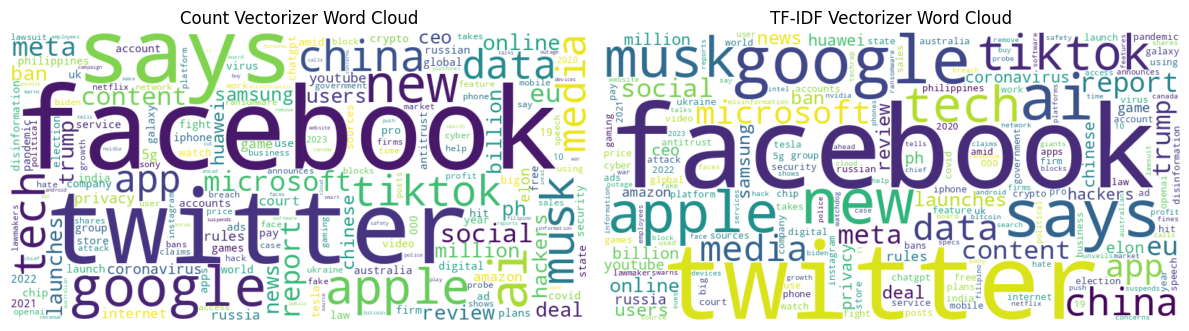

In [50]:
# Create word cloud and word frequency visualization
count_wordcloud = (WordCloud(width=800, height=400,
                             background_color='white')
                   .generate_from_frequencies(count_dict))

tfidf_wordcloud = (WordCloud(width=800, height=400,
                             background_color='white')
                   .generate_from_frequencies(tfidf_dict))

# Plot the word clouds and word frequency visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(count_wordcloud, interpolation='bilinear')
plt.title('Count Vectorizer Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.title('TF-IDF Vectorizer Word Cloud')
plt.axis("off")

plt.tight_layout()
plt.show()

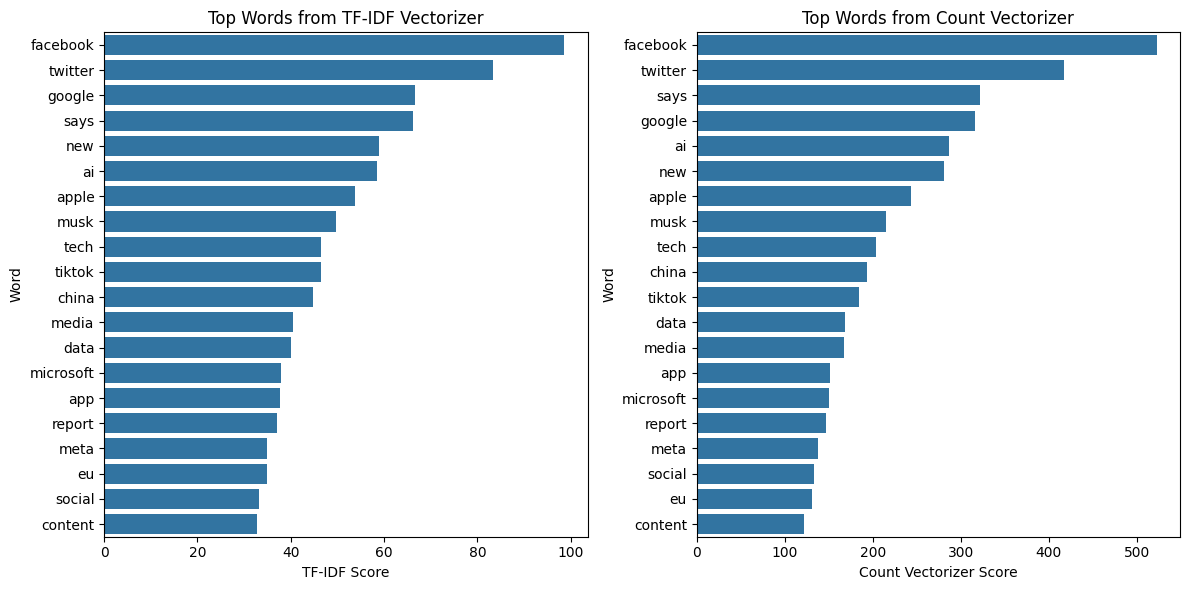

In [51]:
# Function to get the top N important words from the vectorized data
def get_top_words(vectorized_data, vectorizer, n=10):
    feature_names = vectorizer.get_feature_names_out()
    sum_words = vectorized_data.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in zip(feature_names,
                                       range(sum_words.shape[1]))]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:n]
    return top_words

# Get the top N important words from TF-IDF Vectorizer and Count Vectorizer
top_words_tfidf = get_top_words(tfidf_matrix, tfidf_vectorizer, n=20)
top_words_count = get_top_words(cv_matrix, count_vectorizer, n=20)

# Create dataframes for the top words
top_words_tfidf_df = pd.DataFrame(top_words_tfidf,
                                  columns=['Word', 'TF-IDF Score'])

top_words_count_df = pd.DataFrame(top_words_count,
                                  columns=['Word', 'Count Vectorizer Score'])

# Plot bar charts for the top words
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='TF-IDF Score', y='Word', data=top_words_tfidf_df)
plt.title('Top Words from TF-IDF Vectorizer')
plt.xlabel('TF-IDF Score')

plt.subplot(1, 2, 2)
sns.barplot(x='Count Vectorizer Score', y='Word', data=top_words_count_df)
plt.title('Top Words from Count Vectorizer')
plt.xlabel('Count Vectorizer Score')

plt.tight_layout()
plt.show()